### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



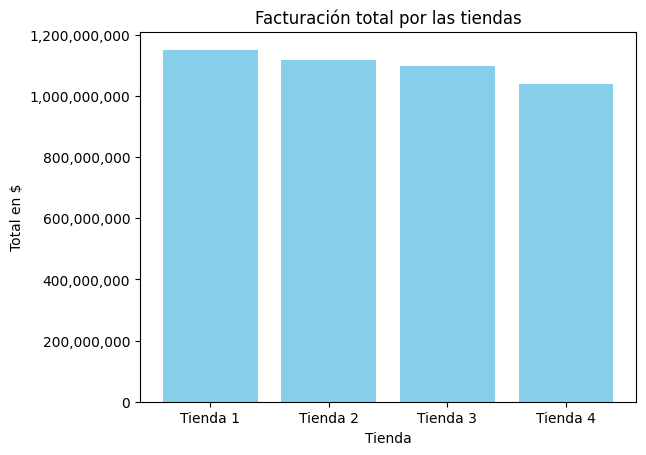

In [16]:
# Calcular la facturación total de cada tienda
facturacion_tienda1 = tienda['Precio'].sum()
facturacion_tienda2 = tienda2['Precio'].sum()
facturacion_tienda3 = tienda3['Precio'].sum()
facturacion_tienda4 = tienda4['Precio'].sum()

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker  # esto es nuevo

nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
valores = [facturacion_tienda1, facturacion_tienda2, facturacion_tienda3, facturacion_tienda4]

plt.bar(nombres_tiendas, valores, color='skyblue')
plt.title('Facturación total por las tiendas')
plt.ylabel('Total en $')
plt.xlabel('Tienda')

# Formatear el eje Y para mostrar números normales
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.show()

# 2. Ventas por categoría

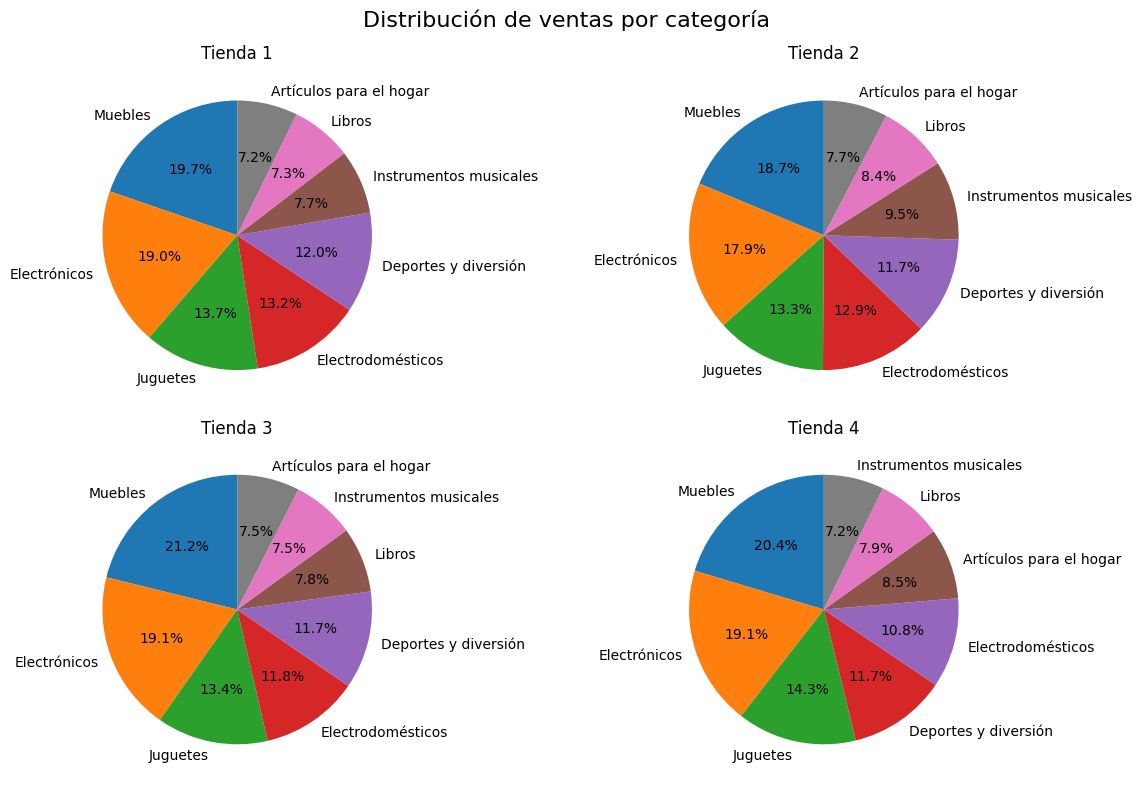

In [26]:
import matplotlib.pyplot as plt

# Preparar datos de cada tienda
ventas_cat_t1 = tienda["Categoría del Producto"].value_counts()
ventas_cat_t2 = tienda2["Categoría del Producto"].value_counts()
ventas_cat_t3 = tienda3["Categoría del Producto"].value_counts()
ventas_cat_t4 = tienda4["Categoría del Producto"].value_counts()

# Crear figura
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Tienda 1
axs[0,0].pie(ventas_cat_t1, labels=ventas_cat_t1.index, autopct="%1.1f%%", startangle=90)
axs[0,0].set_title("Tienda 1")

# Tienda 2
axs[0,1].pie(ventas_cat_t2, labels=ventas_cat_t2.index, autopct="%1.1f%%", startangle=90)
axs[0,1].set_title("Tienda 2")

# Tienda 3
axs[1,0].pie(ventas_cat_t3, labels=ventas_cat_t3.index, autopct="%1.1f%%", startangle=90)
axs[1,0].set_title("Tienda 3")

# Tienda 4
axs[1,1].pie(ventas_cat_t4, labels=ventas_cat_t4.index, autopct="%1.1f%%", startangle=90)
axs[1,1].set_title("Tienda 4")

plt.suptitle("Distribución de ventas por categoría", fontsize=16)
plt.tight_layout()
plt.show()


# 3. Calificación promedio de la tienda


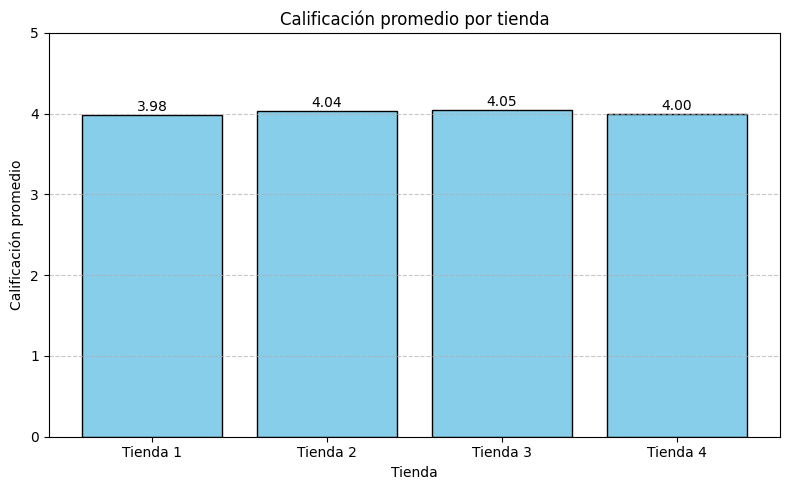

In [27]:
import matplotlib.pyplot as plt

# Calcular calificación promedio de cada tienda
promedio_t1 = tienda["Calificación"].mean()
promedio_t2 = tienda2["Calificación"].mean()
promedio_t3 = tienda3["Calificación"].mean()
promedio_t4 = tienda4["Calificación"].mean()

# Datos para el gráfico
tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
promedios = [promedio_t1, promedio_t2, promedio_t3, promedio_t4]

# Crear gráfico
plt.figure(figsize=(8,5))
plt.bar(tiendas, promedios, color="skyblue", edgecolor="black")
plt.ylabel("Calificación promedio")
plt.xlabel("Tienda")
plt.title("Calificación promedio por tienda")
plt.ylim(0, 5)  # Escala de 0 a 5
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Mostrar valores encima de las barras
for i, valor in enumerate(promedios):
    plt.text(i, valor + 0.05, f"{valor:.2f}", ha="center", fontsize=10)

plt.tight_layout()
plt.show()



# 4. Productos más y menos vendidos

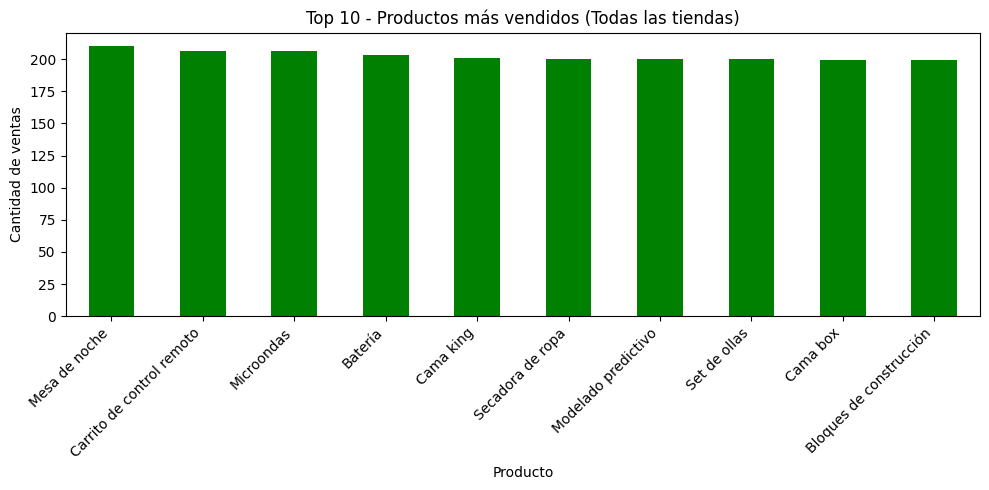

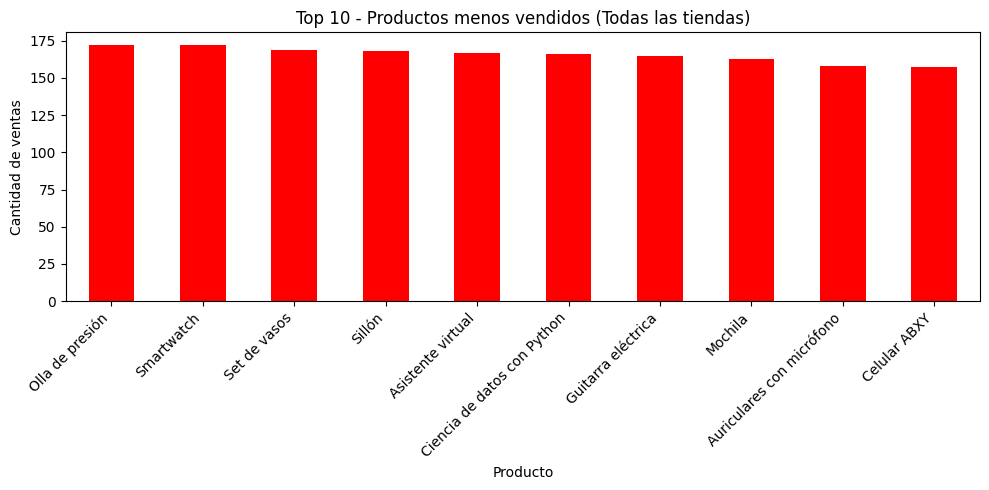

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Unir las 4 tiendas en un solo DataFrame con etiqueta de tienda
tienda1_df = tienda.copy()
tienda1_df["Tienda"] = "Tienda 1"

tienda2_df = tienda2.copy()
tienda2_df["Tienda"] = "Tienda 2"

tienda3_df = tienda3.copy()
tienda3_df["Tienda"] = "Tienda 3"

tienda4_df = tienda4.copy()
tienda4_df["Tienda"] = "Tienda 4"

# Concatenar todo
todas_tiendas = pd.concat([tienda1_df, tienda2_df, tienda3_df, tienda4_df])

# Contar ventas totales por producto (todas las tiendas)
ventas_totales = todas_tiendas["Producto"].value_counts()

# Top 10 más vendidos y menos vendidos
mas_vendidos = ventas_totales.head(10)
menos_vendidos = ventas_totales.tail(10)

# --- Gráfico: Más vendidos ---
plt.figure(figsize=(10,5))
mas_vendidos.plot(kind="bar", color="green")
plt.title("Top 10 - Productos más vendidos (Todas las tiendas)")
plt.ylabel("Cantidad de ventas")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# --- Gráfico: Menos vendidos ---
plt.figure(figsize=(10,5))
menos_vendidos.plot(kind="bar", color="red")
plt.title("Top 10 - Productos menos vendidos (Todas las tiendas)")
plt.ylabel("Cantidad de ventas")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


# 5. Envío promedio por tienda

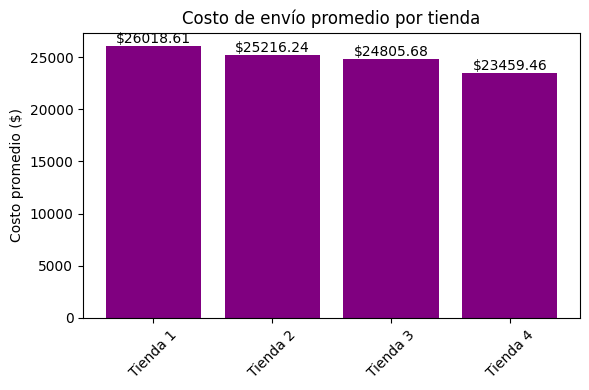

In [24]:
import matplotlib.pyplot as plt

# Promedio de costo de envío por tienda
envio_promedio = {
    "Tienda 1": tienda["Costo de envío"].mean(),
    "Tienda 2": tienda2["Costo de envío"].mean(),
    "Tienda 3": tienda3["Costo de envío"].mean(),
    "Tienda 4": tienda4["Costo de envío"].mean()
}

# Gráfico
plt.figure(figsize=(6,4))
bars = plt.bar(envio_promedio.keys(), envio_promedio.values(), color='purple')
plt.title("Costo de envío promedio por tienda")
plt.ylabel("Costo promedio ($)")
plt.xticks(rotation=45)

# Añadir etiquetas de valor encima de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f"${yval:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()


# Conclusión
El análisis de las cuatro tiendas revela que, a pesar de contar con una buena calificación promedio por parte de los clientes, la Tienda 4 presenta la facturación más baja del portafolio.

# Explicación
Si bien la satisfacción del cliente es un indicador positivo, el desempeño financiero de la Tienda 4 no es suficiente para justificar su permanencia en la cartera de negocios. En comparación con las demás tiendas, su bajo volumen de ventas limita su rentabilidad y potencial de crecimiento. Por este motivo, se recomienda su venta y la reasignación de recursos hacia las unidades con mayor capacidad de generar ingresos sostenibles.